In [147]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web

from datetime import date,datetime,time,timezone

In [148]:
def get_stock_data(ticker,start,end):
    data = yf.download(ticker,start=start,end=end)
    data.insert(0,"Ticker",ticker)
    return data

In [149]:
ticker='DIS'
start=datetime(2020,1,1)
end=datetime.today()

In [150]:
d=get_stock_data(ticker,start,end)
d.head()

[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Ticker,,DIS,DIS,DIS,DIS,DIS,DIS
Date,,,,,,,
2020-01-02 00:00:00+00:00,DIS,147.040207,148.199997,148.199997,145.100006,145.289993,9502100
2020-01-03 00:00:00+00:00,DIS,145.353500,146.500000,147.899994,146.050003,146.399994,7320200
2020-01-06 00:00:00+00:00,DIS,144.510147,145.649994,146.029999,144.309998,145.539993,8262500
2020-01-07 00:00:00+00:00,DIS,144.559769,145.699997,146.869995,145.419998,145.990005,6906500
2020-01-08 00:00:00+00:00,DIS,144.262100,145.399994,146.130005,144.820007,145.490005,6984200


In [151]:
d= data['Close']
d.head()

Ticker,DIS
Date,
2020-01-02 00:00:00+00:00,148.199997
2020-01-03 00:00:00+00:00,146.500000
2020-01-06 00:00:00+00:00,145.649994
2020-01-07 00:00:00+00:00,145.699997
2020-01-08 00:00:00+00:00,145.399994


In [152]:
SPY=get_stock_data("SPY",start,end)
IYW=get_stock_data("IYW",start,end)
VT=get_stock_data("VT",start,end)
DBA=get_stock_data("DBA",start,end)
TLT=get_stock_data("TLT",start,end)
PDBC=get_stock_data("PDBC",start,end)
IAU=get_stock_data("IAU",start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [153]:
print(SPY.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1217 entries, 2020-01-02 00:00:00+00:00 to 2024-10-31 00:00:00+00:00
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Ticker, )        1217 non-null   object 
 1   (Adj Close, SPY)  1217 non-null   float64
 2   (Close, SPY)      1217 non-null   float64
 3   (High, SPY)       1217 non-null   float64
 4   (Low, SPY)        1217 non-null   float64
 5   (Open, SPY)       1217 non-null   float64
 6   (Volume, SPY)     1217 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 76.1+ KB
None


In [154]:
SPY=SPY["Close"]
IYW=IYW["Close"]
VT=VT["Close"]
DBA=DBA["Close"]
TLT=TLT["Close"]
PDBC=PDBC["Close"]
IAU=IAU["Close"]

In [155]:
stock=pd.concat([SPY,IYW,VT,DBA,TLT,PDBC,IAU],
                axis=1,
                join='outer')
stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02 00:00:00+00:00,324.869995,59.355000,81.809998,16.500000,137.009995,16.639999,29.219999
2020-01-03 00:00:00+00:00,322.410004,58.762501,81.070000,16.309999,139.119995,16.780001,29.620001
2020-01-06 00:00:00+00:00,323.640015,59.125000,81.370003,16.350000,138.330002,16.799999,29.920000
2020-01-07 00:00:00+00:00,322.730011,59.147499,81.120003,16.389999,137.649994,16.770000,30.040001
2020-01-08 00:00:00+00:00,324.450012,59.737499,81.449997,16.309999,136.740005,16.540001,29.820000


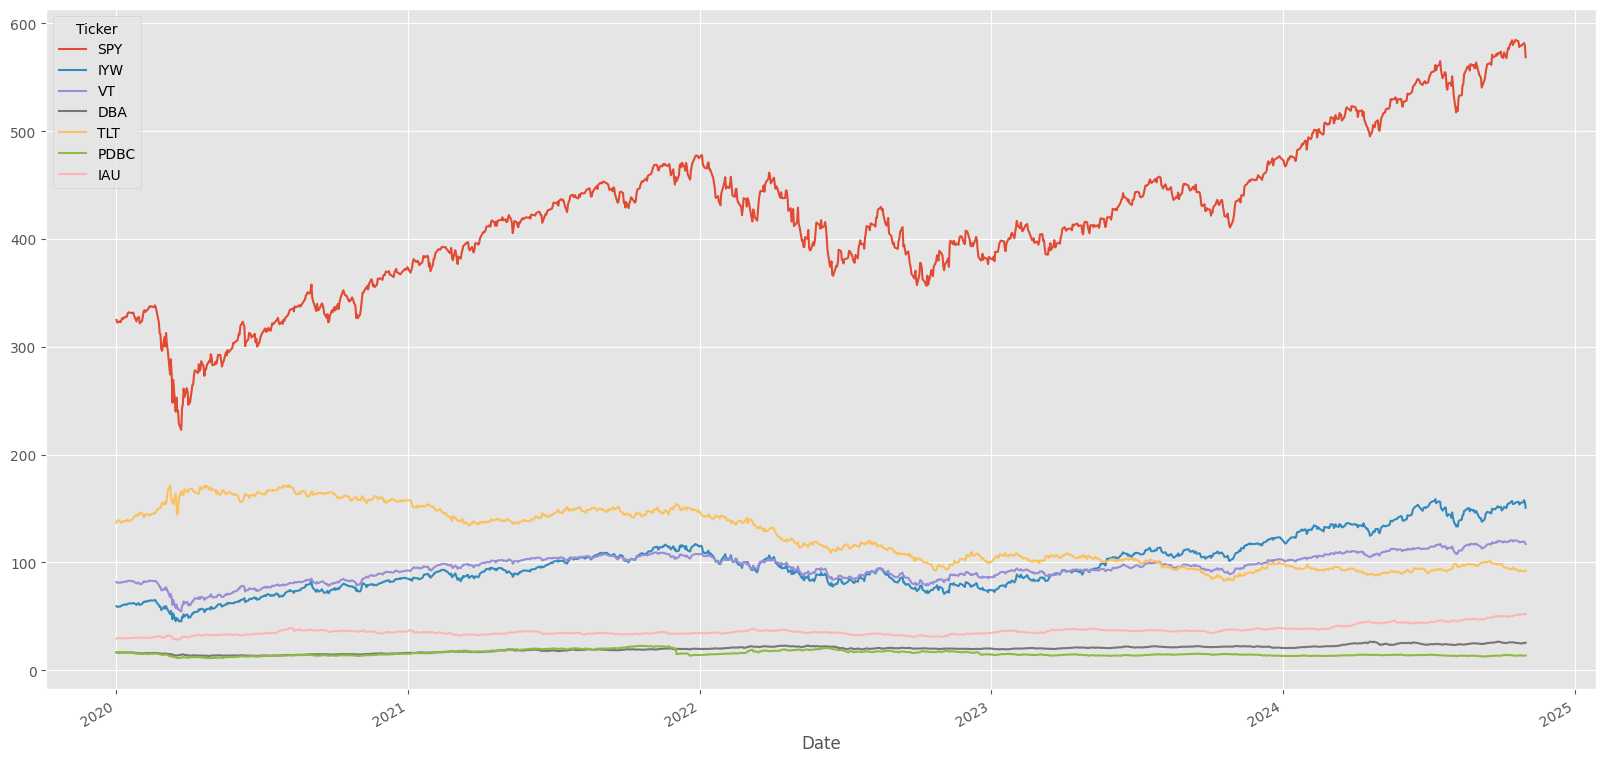

In [156]:
plt.style.use('ggplot')
stock.plot(figsize=(20,10))
plt.show()

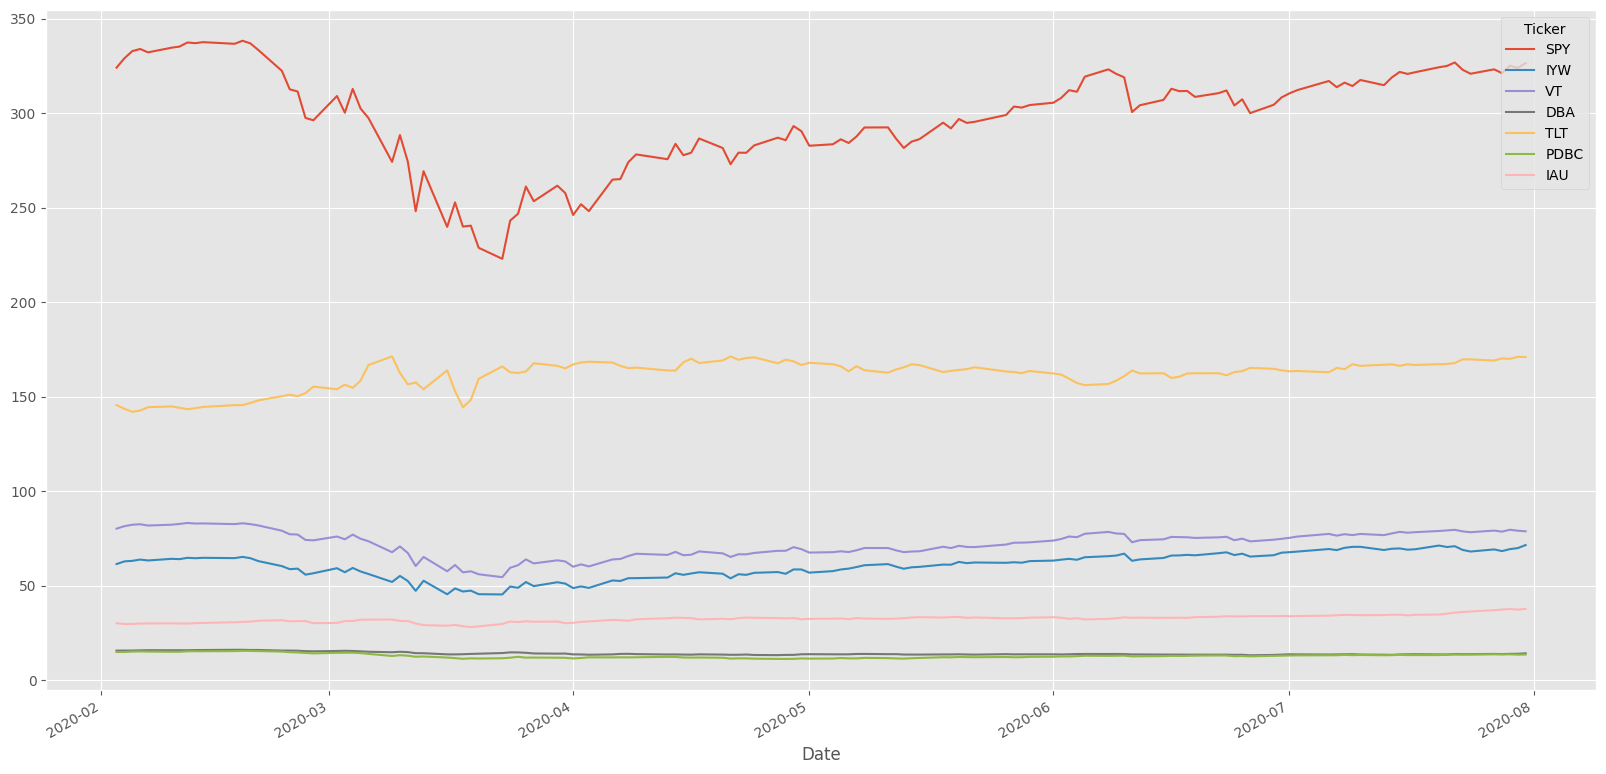

In [157]:
covid=stock['2020-2-1':'2020-7-31']
plt.style.use('ggplot')
covid.plot(figsize=(20,10))
plt.show()

In [158]:
x=covid.index
s_y=covid[['SPY']]
i_y=covid[['IAU']]
d_y=covid[['DBA']]
t_y=covid[['TLT']]

Text(0.5, 0.98, 'Covid 19')

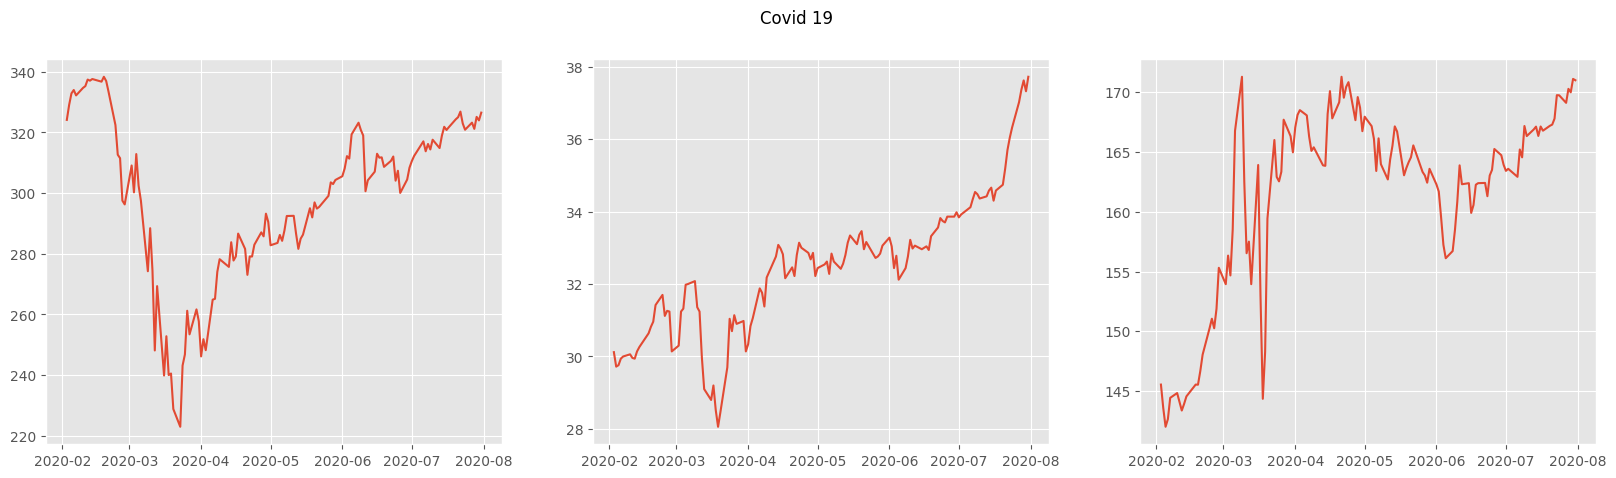

In [159]:
import matplotlib.pyplot as plt

fig,axs=plt.subplots(1,3, figsize=(20,5))
axs[0].plot(x, s_y)
axs[1].plot(x, i_y)
axs[2].plot(x, t_y)

fig.suptitle('Covid 19')

In [160]:
ticker='PDBC'
start=datetime(2020,1,1)
end=datetime.today()

In [161]:
df=get_stock_data(ticker,start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Ticker,,PDBC,PDBC,PDBC,PDBC,PDBC,PDBC
Date,,,,,,,
2020-01-02 00:00:00+00:00,PDBC,9.154051,16.639999,16.670000,16.520000,16.570000,4004600
2020-01-03 00:00:00+00:00,PDBC,9.231069,16.780001,16.840000,16.709999,16.809999,760200
2020-01-06 00:00:00+00:00,PDBC,9.242069,16.799999,16.910000,16.770000,16.900000,1608700
2020-01-07 00:00:00+00:00,PDBC,9.225567,16.770000,16.799999,16.716999,16.750000,1723200
2020-01-08 00:00:00+00:00,PDBC,9.099039,16.540001,16.770000,16.363001,16.770000,923300


In [162]:
df.drop(['Ticker','High','Low','Open',"Close","Adj Close"],axis=1,inplace=True)

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7484\3992444924.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(['Ticker','High','Low','Open',"Close","Adj Close"],axis=1,inplace=True)


In [163]:
df.head()

Price,Volume
Ticker,PDBC
Date,
2020-01-02 00:00:00+00:00,4004600
2020-01-03 00:00:00+00:00,760200
2020-01-06 00:00:00+00:00,1608700
2020-01-07 00:00:00+00:00,1723200
2020-01-08 00:00:00+00:00,923300


TypeError: only length-1 arrays can be converted to Python scalars

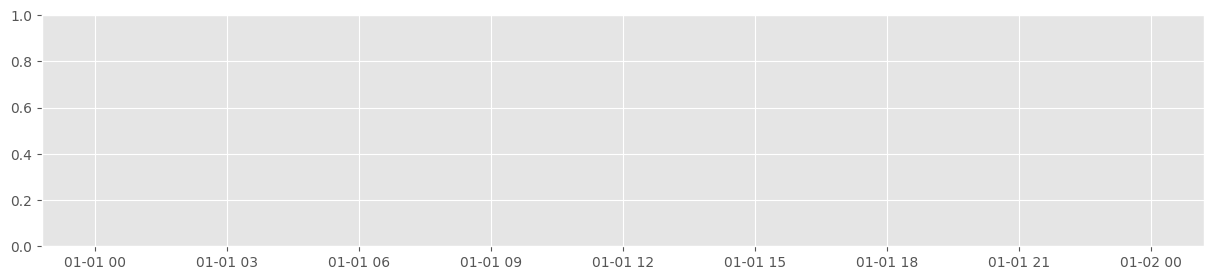

In [164]:
x = df.index.tolist()  # Convert index to a list
y = df['Volume']
plt.figure(figsize=(15, 3))
plt.bar(x, y, color='gray')
plt.title(f'{ticker} Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()